# <center> Data Science I: Foundations - Final Project

### <center> <font color='gray'>by Rahul Shrivastava, MS-DSPP '23</font> 

In [1]:
# Required Packages
import pandas as pd
import numpy as np

# Data Management/Investigation
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.naive_bayes import GaussianNB as NB # Classifier 
import statsmodels.formula.api as smf

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Importing in the data
# Reading in the csv files
dta = pd.read_csv(r"Data\finsec-countries.csv")

dta.shape

(51, 13)

In [3]:
dta = dta.rename(columns={'FinSec Growth': 'finsecgrowth'})

## Visualizing the Data

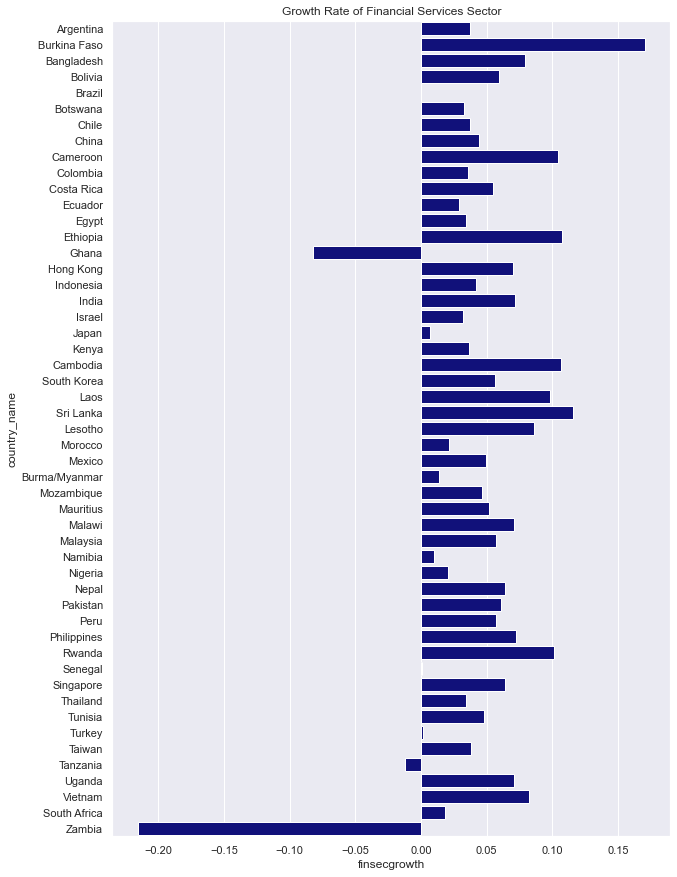

In [4]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 15))
bar1 = sns.barplot(y="country_name",  x="finsecgrowth", data=dta, color='darkblue')
plt.title('Growth Rate of Financial Services Sector')
plt.savefig('figure_1.png', dpi=300)
plt.show()

In [5]:
dta.dtypes

cnt                    object
country_name           object
year                    int64
v2x_polyarchy         float64
v2x_freexp_altinf     float64
v2xel_frefair         float64
v2xcl_rol             float64
v2x_jucon             float64
v2xeg_eqprotec        float64
country                object
var                    object
Financial services    float64
finsecgrowth          float64
dtype: object

In [6]:
dta = dta.drop(columns=['country_name','country', 'var', 'Financial services', 'cnt', 'year'])

In [7]:
dta.head(10)

,v2x_polyarchy,v2x_freexp_altinf,v2xel_frefair,v2xcl_rol,v2x_jucon,v2xeg_eqprotec,finsecgrowth
0,0.779,0.860,0.863,0.883,0.748,0.792,0.037324
1,0.715,0.894,0.768,0.756,0.628,0.822,0.170746
2,0.287,0.467,0.173,0.389,0.166,0.158,0.078971
3,0.614,0.755,0.697,0.786,0.360,0.747,0.059743
4,0.762,0.803,0.895,0.733,0.845,0.386,0.000233
5,0.686,0.825,0.805,0.909,0.853,0.743,0.032665
6,0.863,0.917,0.966,0.943,0.931,0.787,0.036983
7,0.077,0.054,0.000,0.236,0.142,0.250,0.044048
8,0.312,0.588,0.188,0.474,0.119,0.644,0.104136
9,0.649,0.729,0.745,0.700,0.846,0.400,0.035510


## Visualizing Relationships of Variables

<AxesSubplot:xlabel='v2xeg_eqprotec', ylabel='finsecgrowth'>

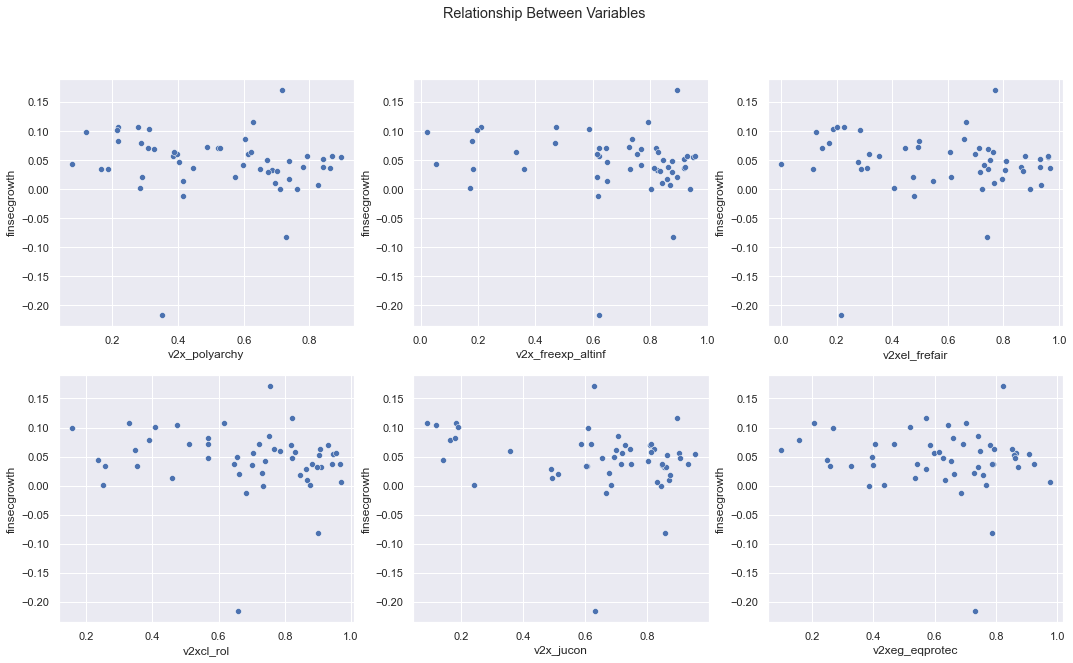

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Relationship Between Variables')

sns.scatterplot(ax=axes[0, 0], data=dta, x='v2x_polyarchy', y='finsecgrowth')
sns.scatterplot(ax=axes[0, 1], data=dta, x='v2x_freexp_altinf', y='finsecgrowth')
sns.scatterplot(ax=axes[0, 2], data=dta, x='v2xel_frefair', y='finsecgrowth')
sns.scatterplot(ax=axes[1, 0], data=dta, x='v2xcl_rol', y='finsecgrowth')
sns.scatterplot(ax=axes[1, 1], data=dta, x='v2x_jucon', y='finsecgrowth')
sns.scatterplot(ax=axes[1, 2], data=dta, x='v2xeg_eqprotec', y='finsecgrowth')

## Visualizing Missingness

<AxesSubplot:>

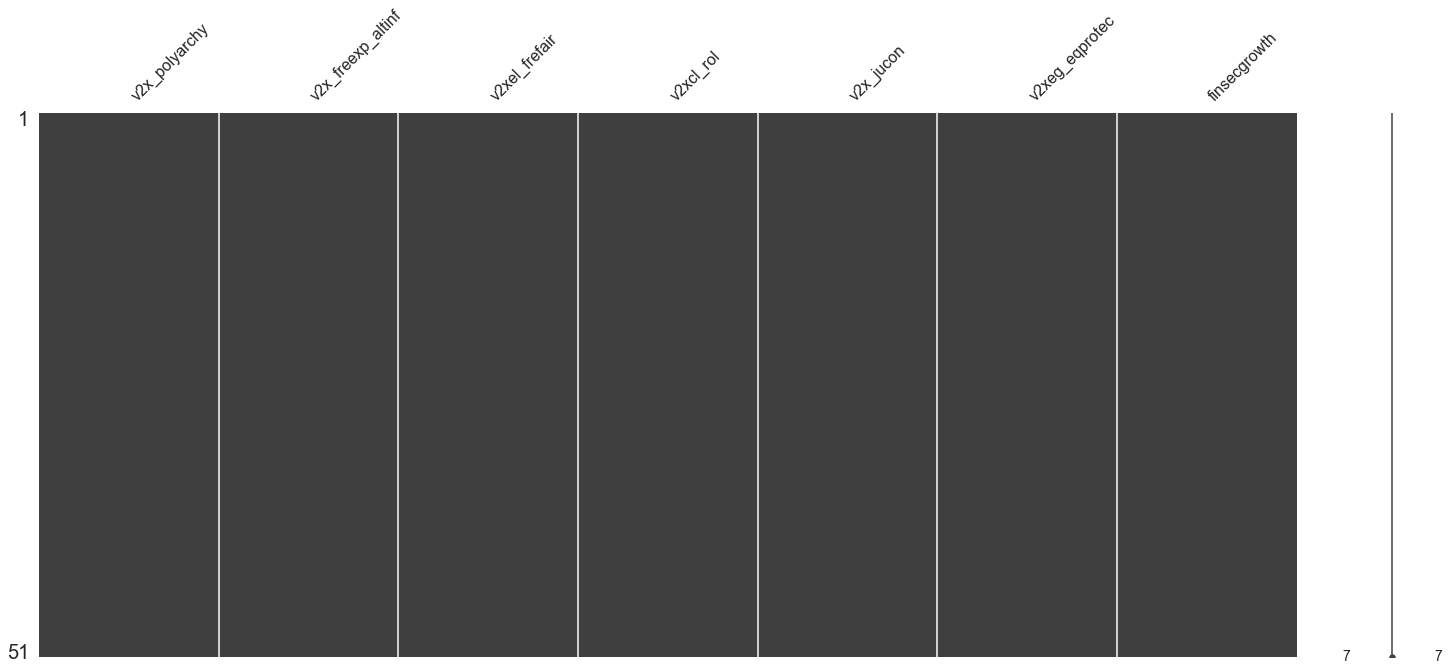

In [9]:
miss.matrix(dta)

## Splitting the Data

In [10]:
# Splitting the data

y = dta[['finsecgrowth']]
X = dta.drop(columns=['finsecgrowth'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

In [11]:
# Examining the split

print(train_X.shape[0]/dta.shape[0])
print(test_X.shape[0]/dta.shape[0])

0.7450980392156863
0.2549019607843137


In [12]:
# Examining the split

train_X

,v2x_polyarchy,v2x_freexp_altinf,v2xel_frefair,v2xcl_rol,v2x_jucon,v2xeg_eqprotec
45,0.840,0.921,0.932,0.968,0.849,0.924
38,0.488,0.726,0.491,0.569,0.618,0.466
34,0.574,0.893,0.476,0.662,0.514,0.662
28,0.414,0.649,0.547,0.459,0.495,0.535
20,0.445,0.812,0.310,0.648,0.715,0.542
16,0.597,0.769,0.730,0.741,0.803,0.654
14,0.728,0.880,0.740,0.900,0.856,0.787
12,0.186,0.183,0.116,0.258,0.605,0.258
3,0.614,0.755,0.697,0.786,0.360,0.747
17,0.522,0.620,0.712,0.721,0.811,0.691


In [13]:
train_X.dtypes

v2x_polyarchy        float64
v2x_freexp_altinf    float64
v2xel_frefair        float64
v2xcl_rol            float64
v2x_jucon            float64
v2xeg_eqprotec       float64
dtype: object

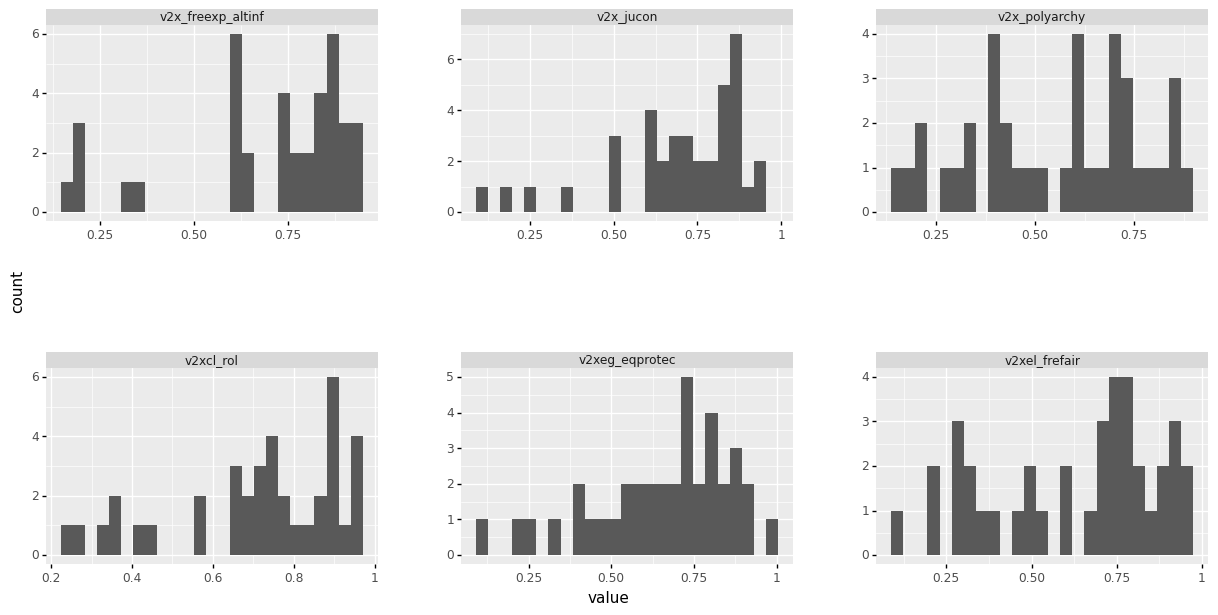

<ggplot: (193756717291)>

In [14]:
# Taking a peak at the distribution of data for continuous variables

d = train_X.select_dtypes(include="float64").melt()

(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,7),
          subplots_adjust={'wspace':0.25, 'hspace':0.75})
)

## Training the Model

Cross Validation

In [15]:
# Adding a K-fold cross-validation with 5 folds

fold_generator = KFold(n_splits=5, shuffle=True,random_state=1234)


#### Initializing the Pipeline
Scaling will take place in the pipeline.

In [16]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

## Select Model and Tuning Params

In [17]:
  # Linear Model
    {'model': [LM()]},

# Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[10,15,20]}

IndentationError: unexpected indent (<ipython-input-17-2a3dba11a9cc>, line 2)

In [18]:
search_space = [
    
  
    
      # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[3,4,5]},
    
    
  
     
]

## Run the Models

In [19]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [20]:
search.fit(train_X,train_y.finsecgrowth)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsRegressor(n_neighbors=3)],
                          'model__n_neighbors': [3, 4, 5]}],
             scoring='roc_auc')

In [21]:
search.best_score_

nan

In [22]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=3), 'model__n_neighbors': 3}

In [23]:
rf_mod = search.best_estimator_

In [24]:
rf_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model', KNeighborsRegressor(n_neighbors=3))])

## Test Performance

In [25]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [26]:
m.mean_squared_error(test_y,pred_y)

0.003799881852494755

In [27]:
m.r2_score(test_y,pred_y)

-3.16639749839348

### Visualize

In [28]:
pred_y

array([ 0.06218904,  0.03850276,  0.02179954,  0.02326365,  0.04805242,
       -0.02263615,  0.02580034,  0.0807528 , -0.0440339 ,  0.05382008,
        0.06974139,  0.08072696,  0.04201021])

In [38]:
pred_y = pd.DataFrame(pred_y)

In [61]:
pred_y = pred_y.rename(columns={'finsecgrowth': 'prediction'})

In [62]:
pred_y

,prediction
0,0.062189
1,0.038503
2,0.021800
3,0.023264
4,0.048052
5,-0.022636
6,0.025800
7,0.080753
8,-0.044034
9,0.053820


In [63]:
test_y = test_y.rename(columns={'finsecgrowth': 'truth'})

In [64]:
test_y

,truth
31,0.070590
24,0.115526
37,0.057310
23,0.098373
22,0.056457
13,0.107382
27,0.049546
2,0.078971
47,0.070915
8,0.104136


In [67]:
pred_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)



In [69]:
newdf = pred_y.join(test_y, how='outer')

In [70]:
newdf

,prediction,truth
0,0.062189,0.070590
1,0.038503,0.115526
2,0.021800,0.057310
3,0.023264,0.098373
4,0.048052,0.056457
5,-0.022636,0.107382
6,0.025800,0.049546
7,0.080753,0.078971
8,-0.044034,0.070915
9,0.053820,0.104136


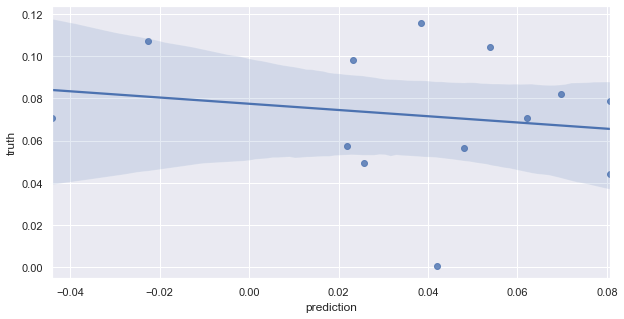

In [84]:
plt.figure(figsize=(10, 5))
sns.regplot(x="prediction", y="truth", data=newdf)
plt.savefig('pred-truth.png', dpi=300)
plt.show()